In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd
#from keras.datset import mnist
#data = mnist.load_data()

np.set_printoptions(suppress=True)

In [3]:
X = np.genfromtxt("cm_dataset_2.csv",delimiter=',')
X = X.T #making the shape dxn as used in class

def run_llyods(X,K,mu_i=None,max_iter=1000):
    #Parameters: Data, Number of Clusters, Initialised Means (Optional), maximum number of iterations (optional)
    #Returns the initialised means used,Final Means and Assignment Vector 
    n = X.shape[1]
    Z = np.zeros(n,dtype=np.uint8)
    error_history = []
    tolerance = 1

    #get k mu's, initialisation step
    if mu_i is None:
        mu_i = X[:,np.random.randint(0,X.shape[1],K)] #if no initial mu is passed, it is randomly chosen
    else:
        pass

    mu = mu_i.copy()

    for iter in range(max_iter):

        #finding error
        error=0
        for i in range(n):
            error_term = ((X[:,i]-mu[:,Z[i]])**2).sum()
            error += error_term

        error_history.append(error)

        # reassignment step
        for i in range(n):
            xi = X[:,i:i+1]
            Z[i] = np.argmin(((xi-mu)**2).sum(axis=0))

        # Finding Means
        k=0
        for k in range(K):
            if (Z==k).sum()!=0:
                mu[:,k] = (X*((Z==k).reshape(1,1000))).sum(axis=1)/(Z==k).sum()


        if iter>2:
            if abs(error_history[-1]-error_history[-2])<tolerance:
                print("Number of Iterations Taken to Converge:",iter)
                break
    else:
        print("Not Converged. Maximum Number of Iteration Reached!")

    return mu_i,mu,Z,error_history

def display_results(X,mu_i,mu,Z,history):
    plt.figure(figsize=(21,7))

    plt.subplot(1,3,1)
    #fig1 = plt.figure()
    #fig1.set_size_inches(5, 5)
    plt.scatter(X[0],X[1])
    plt.scatter(mu_i[0],mu_i[1],color='r')
    plt.xlabel("dimension 1 of the Data")
    plt.ylabel("dimension 2 of the Data")
    plt.title("Data with Initialised Means")
    plt.legend(["Given Data","Initialised Means"],loc="best")

    plt.subplot(1,3,2)
    #fig2 = plt.figure()
    #ig2.set_size_inches(5, 5)
    plt.scatter(X[0],X[1],c=Z)
    plt.scatter(mu[0],mu[1],color='r')
    plt.xlabel("dimension 1 of the Data")
    plt.ylabel("dimension 2 of the Data")
    plt.title("Clustered Data with Number of Clusters = 2")
    plt.legend(["Clustered Data","Final Means"])
        
    plt.subplot(1,3,3)
    plt.plot(history)
    plt.xlabel("Iteration Number")
    plt.ylabel("Error")
    plt.title("Error vs Iteration")
    
    
    plt.show()

Random Initialisation - 1

Number of Iterations Taken to Converge: 9


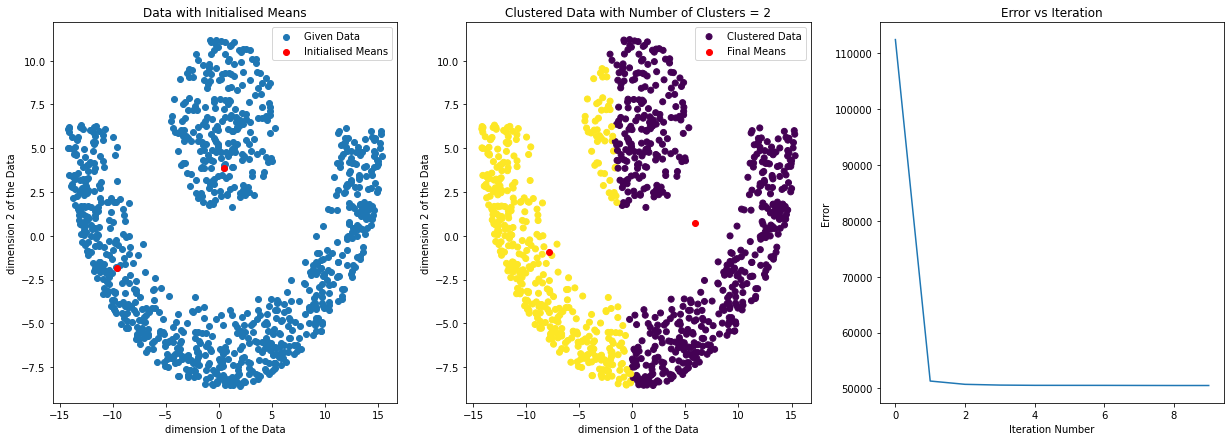

In [4]:
X_centered = X-X.mean(axis=1).reshape(-1,1) #Centering the Data

mu_i,mu,Z,history = run_llyods(X_centered,K=2,max_iter=1000)
display_results(X_centered,mu_i,mu,Z,history)

Random Initialisation - 2

Number of Iterations Taken to Converge: 10


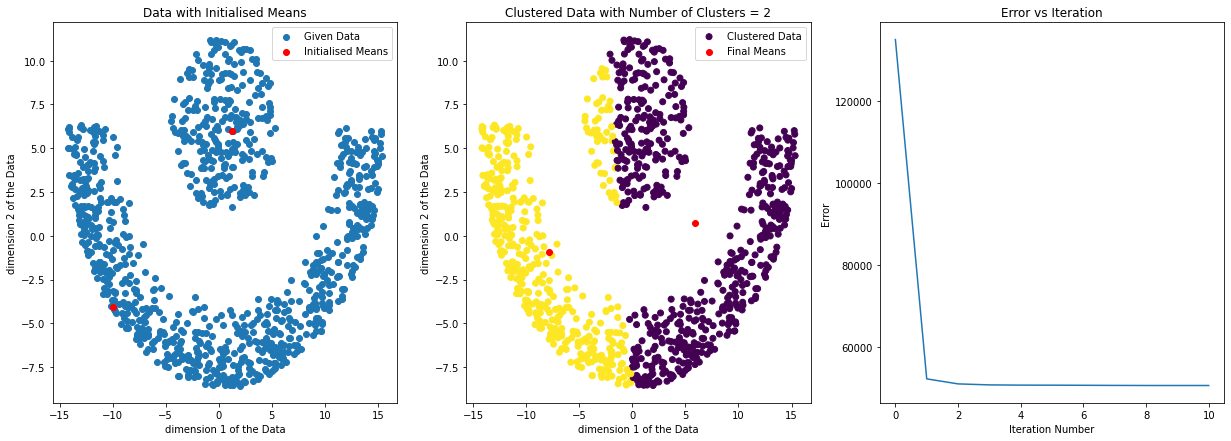

In [5]:
mu_i,mu,Z,history = run_llyods(X_centered,K=2,max_iter=1000)
display_results(X_centered,mu_i,mu,Z,history)

Random Initialisation - 3

Number of Iterations Taken to Converge: 15


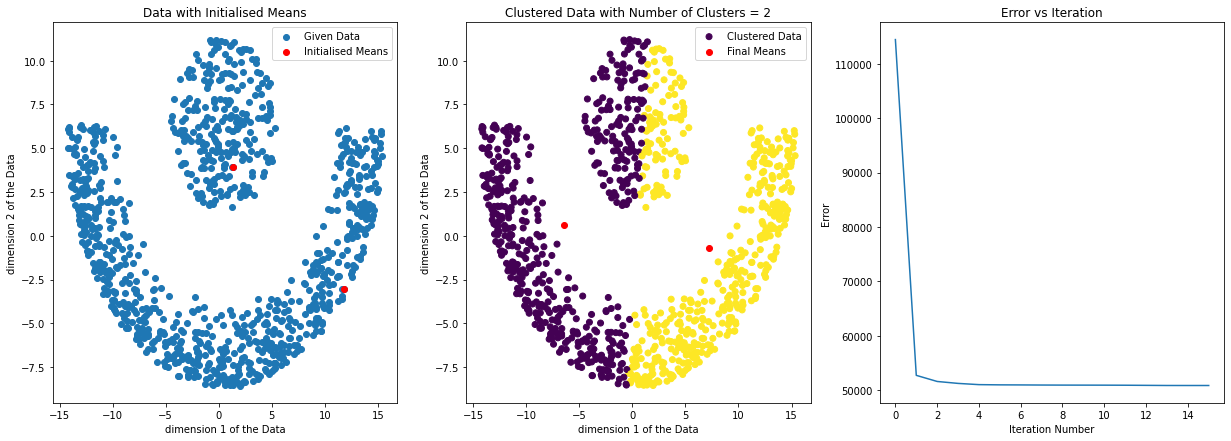

In [6]:
mu_i,mu,Z,history = run_llyods(X_centered,K=2,max_iter=1000)
display_results(X_centered,mu_i,mu,Z,history)

Random Initialisation - 4

Number of Iterations Taken to Converge: 17


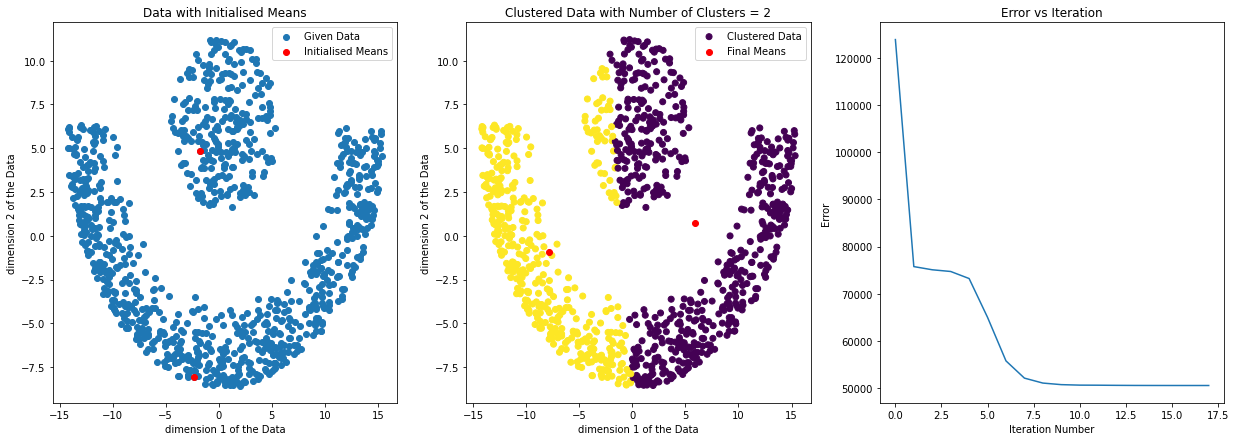

In [7]:
mu_i,mu,Z,history = run_llyods(X_centered,K=2,max_iter=1000)
display_results(X_centered,mu_i,mu,Z,history)

Random Initialisation - 5

Number of Iterations Taken to Converge: 17


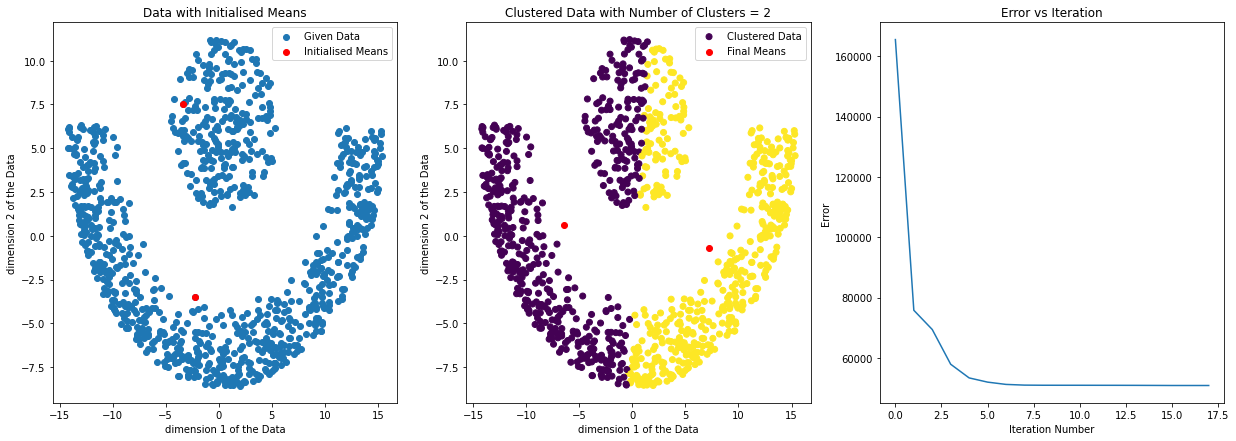

In [8]:
mu_i,mu,Z,history = run_llyods(X_centered,K=2,max_iter=1000)
display_results(X_centered,mu_i,mu,Z,history)

###Q2 (2)

In [9]:
tol = 3
xlim_data = (min(X[0])-tol,max(X[0])+tol)
ylim_data = (min(X[1])-tol,max(X[1])+tol)
mu_random = X[:,np.random.randint(0,X.shape[1],5)] #Fixing a random initialisation for mu

K=2

Number of Iterations Taken to Converge: 16


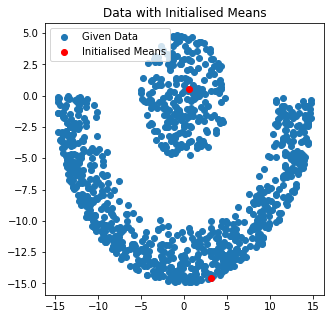

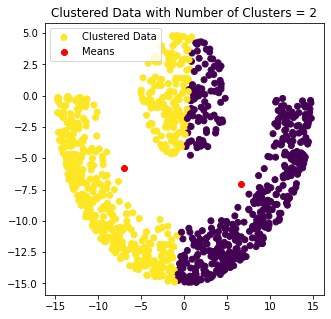

In [11]:
 K= 2
mu_i = mu_random[:,:K]

mu_i,mu,Z,_ = run_llyods(X,K=K,mu_i = mu_i)

fig1 = plt.figure()
fig1.set_size_inches(5, 5)
plt.scatter(X[0],X[1])
plt.scatter(mu_i[0],mu_i[1],color='r')
#plt.xlim(*xlim_data)
#plt.ylim(*ylim_data)
plt.title("Data with Initialised Means")
plt.legend(["Given Data","Initialised Means"],loc="best")

#vor = Voronoi(mu.T)
#fig = voronoi_plot_2d(vor,show_points=True,show_vertices=False)
fig2 = plt.figure()
fig2.set_size_inches(5, 5)
plt.scatter(X[0],X[1],c=Z)
plt.scatter(mu[0],mu[1],color='r')
#plt.xlim(*xlim_data)
#plt.ylim(*ylim_data)
plt.title("Clustered Data with Number of Clusters = 2")
plt.legend(["Clustered Data","Means"])

plt.show()

K=3

Number of Iterations Taken to Converge: 17


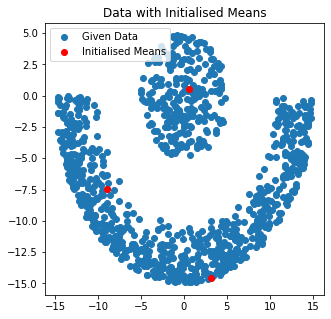

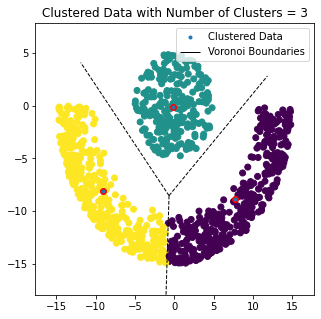

In [12]:
K = 3
mu_i = mu_random[:,:K]

_,mu,Z,_ = run_llyods(X,K=K,mu_i = mu_i)

fig1 = plt.figure()
fig1.set_size_inches(5, 5)
plt.scatter(X[0],X[1])
plt.scatter(mu_i[0],mu_i[1],color='r')
#plt.xlim(*xlim_data)
#plt.ylim(*ylim_data)
plt.title("Data with Initialised Means")
plt.legend(["Given Data","Initialised Means"],loc="best")

vor = Voronoi(mu.T)
fig2=voronoi_plot_2d(vor,show_points=True,show_vertices=False)
fig2.set_size_inches(5,5)
plt.scatter(X[0],X[1],c=Z)
plt.scatter(mu[0],mu[1],color='r')
plt.xlim(*xlim_data)
plt.ylim(*ylim_data)
plt.title("Clustered Data with Number of Clusters = 3")
plt.legend(["Clustered Data","Voronoi Boundaries"])

plt.show()

K=4

Number of Iterations Taken to Converge: 7


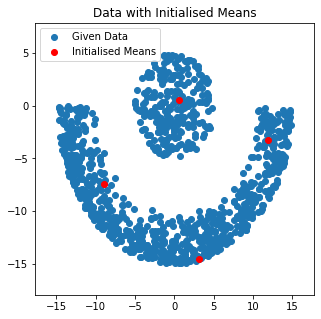

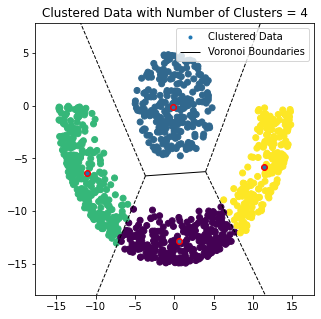

In [13]:
K = 4
mu_i = mu_random[:,:K]

_,mu,Z,_ = run_llyods(X,K=K,mu_i = mu_i)

fig1 = plt.figure()
fig1.set_size_inches(5, 5)
plt.scatter(X[0],X[1])
plt.scatter(mu_i[0],mu_i[1],color='r')
plt.xlim(*xlim_data)
plt.ylim(*ylim_data)
plt.title("Data with Initialised Means")
plt.legend(["Given Data","Initialised Means"],loc="best")

vor = Voronoi(mu.T)
fig2= voronoi_plot_2d(vor,show_points=True,show_vertices=False)
fig2.set_size_inches(5, 5)
plt.scatter(X[0],X[1],c=Z)
plt.scatter(mu[0],mu[1],color='r')
plt.xlim(*xlim_data)
plt.ylim(*ylim_data)
plt.title("Clustered Data with Number of Clusters = 4")
plt.legend(["Clustered Data","Voronoi Boundaries"])

plt.show()

K=5

Number of Iterations Taken to Converge: 12


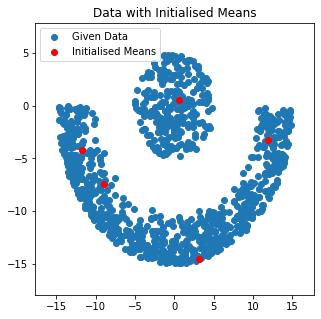

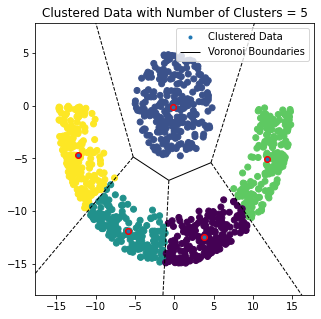

In [14]:
K = 5
mu_i = mu_random[:,:K]

_,mu,Z,_ = run_llyods(X,K=K,mu_i = mu_i)

fig1 = plt.figure()
fig1.set_size_inches(5, 5)
plt.scatter(X[0],X[1])
plt.scatter(mu_i[0],mu_i[1],color='r')
plt.xlim(*xlim_data)
plt.ylim(*ylim_data)
plt.title("Data with Initialised Means")
plt.legend(["Given Data","Initialised Means"],loc="best")

vor = Voronoi(mu.T)
fig2 = voronoi_plot_2d(vor,show_points=True,show_vertices=False)
fig2.set_size_inches(5, 5)
plt.scatter(X[0],X[1],c=Z)
plt.scatter(mu[0],mu[1],color='r')
plt.xlim(*xlim_data)
plt.ylim(*ylim_data)
plt.title("Clustered Data with Number of Clusters = 5")
plt.legend(["Clustered Data","Voronoi Boundaries"])

plt.show()

### Q2(3) : Spectral Clustering

In [15]:
def run_spectral_clustering(X_raw,num_clusters=2,sigma=1,kernel='rbf',d=2):
    X = X_raw.copy()
    n = X.shape[1]

    X = X-X.mean(axis=1).reshape(-1,1)
    K = np.zeros((n,n))
    one_N = np.ones((n,n))/n
    for i in range(n):
        for j in range(n):
            xi = X[:,i]
            xj = X[:,j]
            if kernel == "poly":
                K[i,j] = poly_kernel(xi,xj,d)
            elif kernel == 'rbf':
                K[i,j] = rbf_kernel(xi,xj,sigma)


    Kc = K - one_N@K - K@one_N + one_N@K@one_N

    w,V = np.linalg.eigh(Kc)

    H = V[:,np.flip(w.argsort())] #the columns are always the vectors
    H = H[:,:num_clusters].T
    H_star = H/np.linalg.norm(H,axis=0).reshape(-1,n)
    print("H_star generated, Running LLoyds..")
    mu_i,mu,Z,_ = run_llyods(H_star,K=2)
    return H,H_star,Z,mu,mu_i

In [16]:
def visualise_data1D(H,Z,title=''):
    plt.scatter(H[0],np.zeros(1000),c=Z)
    plt.title(title)
    plt.show()

def visualise_data2D(X,Z,title='',xlabel='',ylabel=''):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16,8, forward=True)
    fig.suptitle(title)
    ax1.scatter(X[0],X[1])

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title("Data")

    ax2.scatter(X[0],X[1],c=Z)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax2.set_title("Clustered Data with Number of Clusters = 2")
    plt.show()

def visualise_data3D(H,Z,title=""):
    fig = go.Figure(data=[go.Scatter3d(
        x=H[0],
        y=H[1],
        z=H[2],
        mode='markers',
        marker=dict(
            size=12,
            color=Z,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.8
        )
    )])
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

In [17]:
xlabel = "Dimension 1 of the Data"
ylabel = "Dimension 2 of the Data"
title = "Spectral Clustering using RBF Kernel with sigma = "

In [20]:
def show_scatter_data(X,title=''):
    fig = go.Figure(data=[go.Scatter(x=X[0,:],y=X[1,:],mode="markers",name='Datapoints')])
    fig.update_layout(title=title,title_x=0.5,
                      xaxis_title="component 1",
                      yaxis_title="component 2",
                      yaxis=dict(scaleanchor="x", scaleratio=1))
    fig.show()

In [22]:
def rbf_kernel(xi,xj,sigma):
    return np.exp(-((xi-xj).T)@(xi-xj)/(2*sigma*sigma))

In [23]:
H,H_star,Z,_,_ = run_spectral_clustering(X_centered,2,kernel='rbf',sigma=0.6)

H_star generated, Running LLoyds..
Number of Iterations Taken to Converge: 6


In [24]:
show_scatter_data(H_star[:,:],title="H_star matrix visualisation (Looking at 2 dimensions of the k-dim data)")

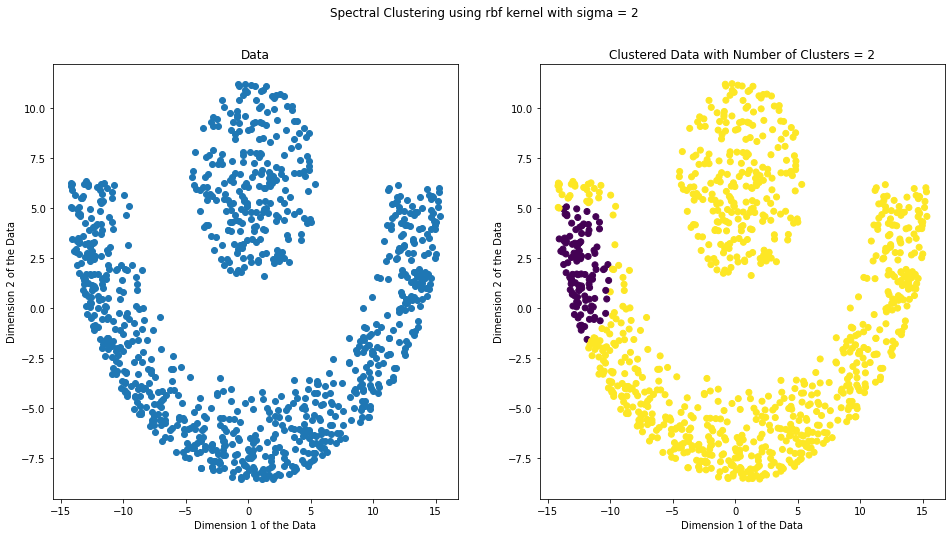

In [25]:
visualise_data2D(X_centered,Z,xlabel = "Dimension 1 of the Data",ylabel = "Dimension 2 of the Data",title="Spectral Clustering using rbf kernel with sigma = 2")

###Q2(4)

Generating the assigment vector Z directly from H_star matrix by taking arg max over the columns


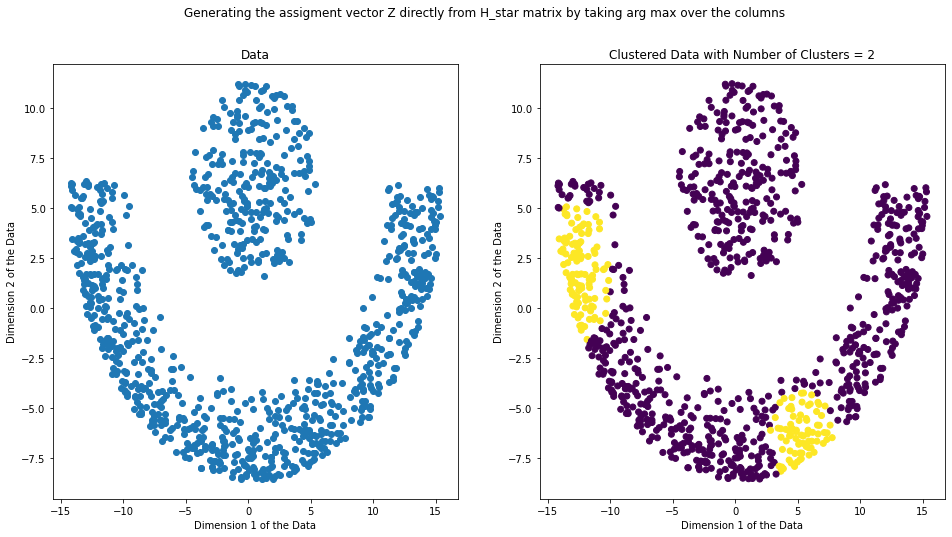

In [26]:
Z = H_star[:,:].argmax(axis=0) 
visualise_data2D(X_centered,Z,xlabel = "Dimension 1 of the Data",ylabel = "Dimension 2 of the Data",title="Generating the assigment vector Z directly from H_star matrix by taking arg max over the columns")

###Alternate Method - Kernel PCA followed by Llyods

In this method, only one component is taken and it happens to be linearly seperable as depicted in the 1D, 2D, 3D graphs

In [28]:
def get_kernel_components_rbf(X,sigma,num_components=2):
    '''It returns the components using rbf kernel'''
    n = X.shape[1]
    one_N = np.ones((n,n))/n
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            xi = X[:,i]
            xj = X[:,j]
            K[i,j] = rbf_kernel(xi,xj,sigma)

    Kc = K - one_N@K - K@one_N + one_N@K@one_N
    w,V = np.linalg.eig(Kc)
    w=w.real #imaginary part is negligible and real symmetric matrices have only real eigen values
    V = V.real
    alphak = V[:,np.flip(w.argsort())]
    alphak = alphak/((np.abs(w))**0.5)
    kernel_comps = (Kc.T@(alphak[:,0:num_components])).T

    return kernel_comps

In [29]:
kernel_comps = get_kernel_components_rbf(X,sigma=3,num_components=3)
mu_i,mu,Z,_ = run_llyods(kernel_comps[0:1],K=2)

Number of Iterations Taken to Converge: 3


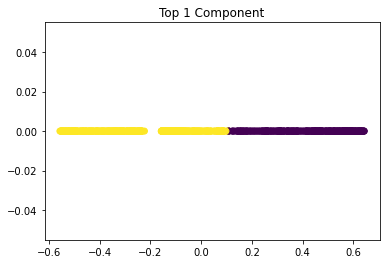

In [30]:
visualise_data1D(kernel_comps,Z,title="Top 1 Component")

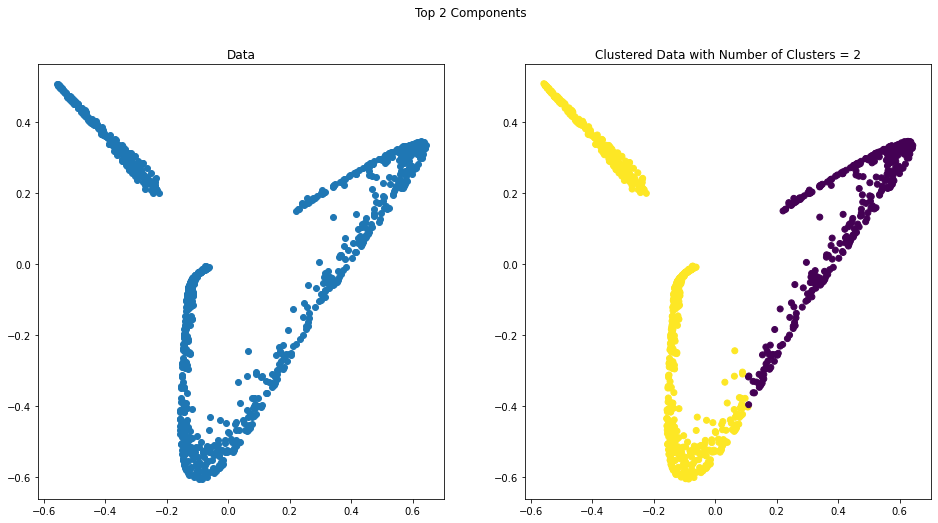

In [31]:
visualise_data2D(kernel_comps,Z,title="Top 2 Components")

In [32]:
visualise_data3D(kernel_comps,Z,title="Top 3 Components")

###Final Result

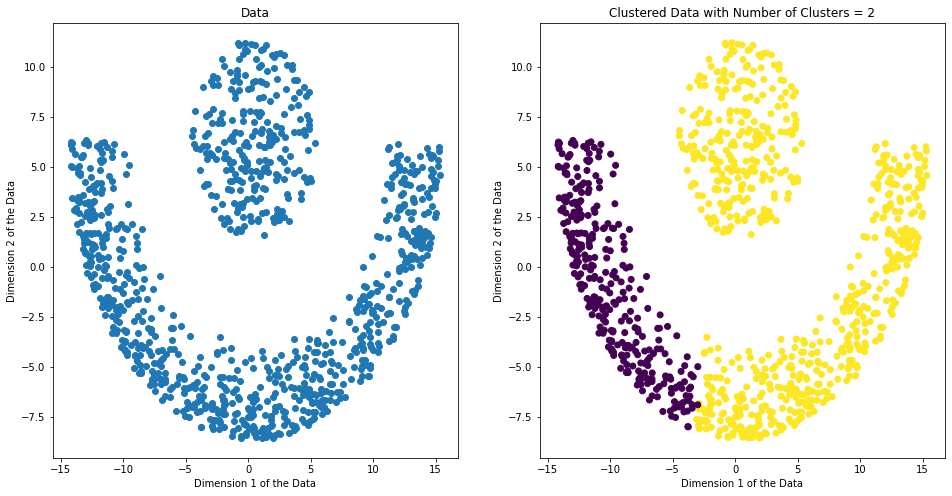

In [33]:
visualise_data2D(X_centered,Z,xlabel = "Dimension 1 of the Data",ylabel = "Dimension 2 of the Data")